# Regresion logistica



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Social_Network_Ads.csv")

# Dimension del df (400 obs y 5 variables)
df.shape


(400, 5)

In [7]:
# Definimos las variables independientes (Edad y Salario)
x = df.iloc[:,[2,3]].values

# Variable objetivo (Compra=1, no compra=0)(Variable dicotomica)
y = df.iloc[:,4].values

In [8]:
# Division del df en data train y test. Seleccionamos un 25% para prueba (100 observaciones), ademas
# la seleccion sera aleatoria (random_state=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [9]:
# Como ambas variables independientes (edad y salario) se encuentran en distintas escalas se efectua
# la Estandarizacion de escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# Modelo Logistico y lo entrenamos

from sklearn.linear_model import LogisticRegression
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
# Predicciones
y_pred = clasificador.predict(X_test) # contiene los datos calculados por medio de la regresion logistica.

### Matrix de Confusion

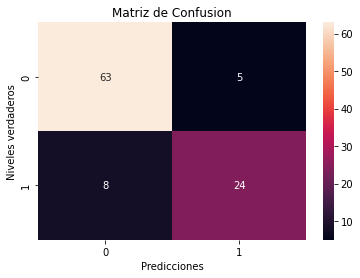

In [38]:
# procedemos a comparar por medio de la Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# Titulos
ax.set_xlabel('Predicciones');ax.set_ylabel('Niveles verdaderos'); 
ax.set_title('Matriz de Confusion'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

Se observa que el modelo tiene un score del 87% (87 valores correctos sobre 100). Existen 8 registros que deberian ser 1 pero fueron clasificados como 0, y 5 registros que deberion ser clasificados como 0, pero fueron registrados como 1. Aunque los resultados son aceptables, este modelo debería ser entrenado con más datos para mejorar sus predicciones.

### Curva ROC

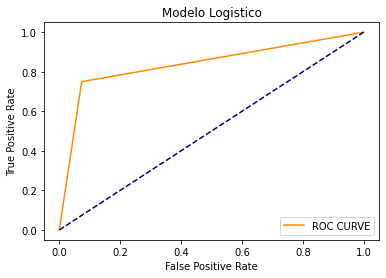

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr,color="darkorange", label="ROC CURVE")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modelo Logistico')
plt.legend(loc="lower right")
plt.show()

La curva representa el porcentaje de verdaderos positivos (True Positive Ratio) (compraron y fueron catalogados como correctamente o no compraron y fueron catalogados como no compradores) (**Recall**), contra el ratio de falsos positivos (False Positive Rate).

### Area Under Curve

A partir de la curva ROC se puede obtener la metrica **AUC** ( área bajo la curva). El valor de esta métrica se encuentra entre 0 y 1.
- Donde 0: es como si tuvieramos un modelo aleatorio (podríamos lanzar una moneda y anotar sus resultados sería mejor modelo).
- Donde 1: es un resultado optimo que indica que el modelo generaliza perfecto (no realista).

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8382352941176471

En este caso el AUC es **83,82%.**

**Visualización de los resultados** 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


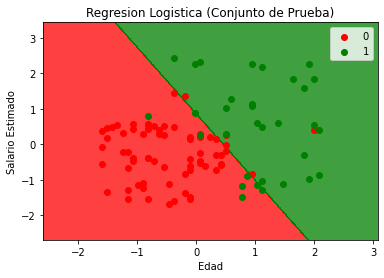

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
# dibujamos el area y colores del mapa
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# limites
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
# configuracion de eje
plt.title('Regresion Logistica (Conjunto de Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

- Zona roja = clientes que no compram (0)
- Zona verde = clientes que compran (1)

Se puede observar que el modelo predijo erroneamente en 13 oportinadades; en 8 casos predijo que los clientes no compraron (cuando si lo hicieron) y 5 casos de clientes que si compraron, pero fueron mal evaluados por el modelo (el modelo dijo que no compraron).

###  Precision del Modelo

In [44]:
score_test = clasificador.score(X_test,y_test)
print(score_test)

0.87


El modelo tiene un 87% de precisión en la clasificación y/o predicción.